In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd drive/MyDrive/Colab Notebooks/lesson-files

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive


In [14]:
from pathlib import Path

all_txt_files =[]
for file in Path("txt").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)
# counts the length of the list
n_files = len(all_txt_files)
print(n_files)

366


In [15]:
all_txt_files.sort()
all_txt_files[0]

PosixPath('txt/0101.txt')

In [16]:
all_docs = []
for txt_file in all_txt_files:
    with open(txt_file) as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)

In [24]:
#import the TfidfVectorizer from Scikit-Learn.  
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(all_docs)


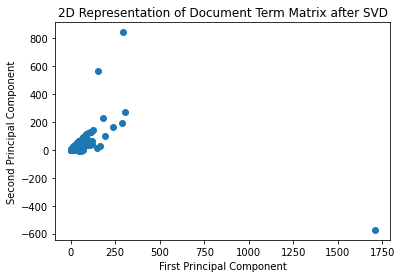

In [23]:
#import the TfidfVectorizer from Scikit-Learn.  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(all_docs)
svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(transformed_documents)

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D Representation of Document Term Matrix after SVD")
plt.show()

There seems to be a singular main group with a few outliers. Most of the documents seems to thus be quite similar to each other. 

In [18]:
transformed_documents_as_array = transformed_documents.toarray()
# use this line of code to verify that the numpy array represents the same number of documents that we have in the file list
len(transformed_documents_as_array)

366

In [19]:
import pandas as pd

# make the output folder if it doesn't already exist
Path("./tf_idf_output").mkdir(parents=True, exist_ok=True)

In [20]:
# construct a list of output file paths using the previous list of text files the relative path for tf_idf_output
output_filenames = [str(txt_file).replace(".txt", ".csv").replace("txt/", "tf_idf_output/") for txt_file in all_txt_files]

# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

    # output to a csv using the enumerated value for the filename
    one_doc_as_df.to_csv(output_filenames[counter])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
